In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the dataset

In [3]:
df = pd.read_csv("E:\\dev_work\\python_projects\\xgb\\input\\surgical.csv")

### Number of rows and columns

In [4]:
df.shape

(14635, 25)

In [5]:
df.head(2)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0


### Class breakup

In [6]:
print ('0 % ',round(df['complication'].value_counts()[0]/len(df)*100,2))
print ('1 % ',round(df['complication'].value_counts()[1]/len(df)*100,2))

0 %  74.79
1 %  25.21


### Separation of input variables from target variable

In [7]:
feature_names = df.iloc[:, 0:len(df.columns)-1].columns
target = df.iloc[:0, len(df.columns)-1:].columns


data_features = df[feature_names]
data_target = df[target]

In [8]:
feature_names

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race'],
      dtype='object')

In [9]:
target

Index(['complication'], dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

# XGBoost

In [11]:
xg = xgb.XGBClassifier()

In [12]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [14]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [16]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

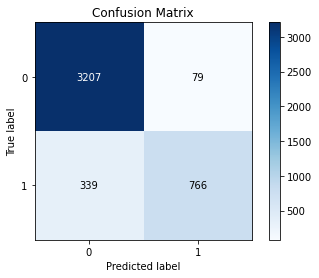

In [17]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [18]:
accuracy_score(y_test, pred)

0.9048052835345024

In [19]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3286
           1       0.91      0.69      0.79      1105

    accuracy                           0.90      4391
   macro avg       0.91      0.83      0.86      4391
weighted avg       0.90      0.90      0.90      4391



In [20]:
from sklearn import metrics          

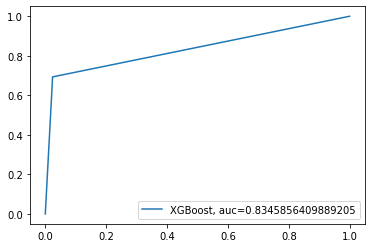

In [21]:
# Creating XGBoost model
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# AUC Curve XGBoost
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict
y_pred=logreg.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

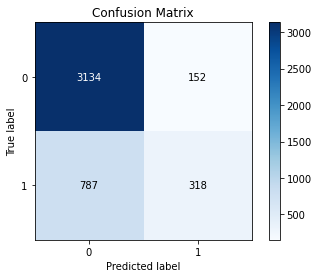

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [25]:
accuracy_score(y_test, y_pred)

0.7861534957868367

In [26]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3286
           1       0.68      0.29      0.40      1105

    accuracy                           0.79      4391
   macro avg       0.74      0.62      0.64      4391
weighted avg       0.77      0.79      0.75      4391



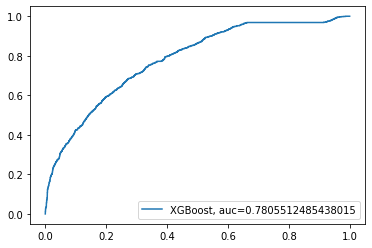

In [27]:
# AUC Curve XGBoost
y_pred_probability = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Bagging Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [29]:
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train,y_train)

In [30]:
BC_Pred = clf.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

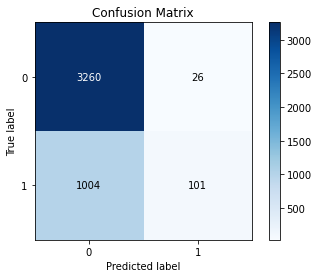

In [31]:
skplt.metrics.plot_confusion_matrix(y_test, BC_Pred)

In [32]:
accuracy_score(y_test, BC_Pred)

0.7654292871783193

In [33]:
print (classification_report(y_test, BC_Pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3286
           1       0.80      0.09      0.16      1105

    accuracy                           0.77      4391
   macro avg       0.78      0.54      0.51      4391
weighted avg       0.77      0.77      0.69      4391

